# Fashion MNIST Image Classification

In this notebook, we will explore the Fashion MNIST dataset and build a Random Forest classifier for image classification. We will cover key concepts in image processing, preprocessing techniques, model training, evaluation, and hyperparameter tuning.

## Introduction to Image Processing

Image processing refers to the manipulation and analysis of digital images to extract meaningful information and enhance visual content. It enables computers to interpret and understand visual data, facilitating the development of intelligent systems capable of automating tasks related to visual perception.

Key concepts in image processing include:
* Digital Image: A two-dimensional array of pixels, where each pixel contains intensity or color values.
* Pixel: The smallest unit of a digital image, represented by one or more numerical values.
* Image Resolution: The number of pixels in an image, usually expressed in terms of width and height.

## Loading the Fashion MNIST Dataset

We will use the Fashion MNIST dataset, which consists of 70,000 grayscale images of fashion products from 10 categories. The dataset is split into 60,000 training images and 10,000 test images, each of size 28x28 pixels.

In [1]:
import pandas as pd

train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [2]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

Before training the Random Forest classifier, we need to preprocess the image data. This involves reshaping the images, applying contrast stretching, and normalizing the pixel values.

In [3]:
from sklearn.preprocessing import StandardScaler
from skimage import exposure

def preprocess_data(X):
    X = X.reshape(-1, 28, 28)

    # Apply contrast stretching
    X = exposure.rescale_intensity(X, out_range=(0, 255))

    X = X.reshape(-1, 28, 28, 1)
    return X

X_train = preprocess_data(train_df.iloc[:, 1:].values)
y_train = train_df.iloc[:, 0].values
X_test = preprocess_data(test_df.iloc[:, 1:].values)
y_test = test_df.iloc[:, 0].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 784)).reshape(-1, 28, 28, 1)
X_test = scaler.transform(X_test.reshape(-1, 784)).reshape(-1, 28, 28, 1)

## Training the Random Forest Classifier

Random Forest is an ensemble learning algorithm that combines multiple decision trees to make robust and accurate predictions. It is well-suited for image classification tasks.

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.reshape(-1, 784), y_train)

RandomForestClassifier(random_state=42)

## Making Predictions

After training the classifier, we can use it to make predictions on the test set.

In [5]:
y_pred = clf.predict(X_test.reshape(-1, 784))

## Evaluation

To evaluate the performance of the classifier, we can calculate various metrics such as accuracy, precision, recall, and F1-score.

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

Accuracy: 0.8857
Precision: 0.8846
Recall: 0.8857
F1-score: 0.8842


The confusion matrix provides a tabular summary of the model's predictions compared to the true labels.

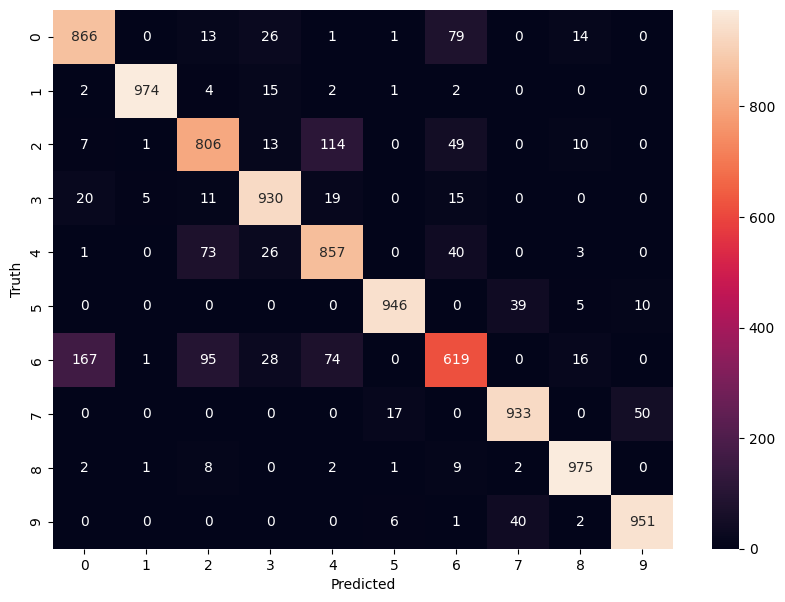

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [8]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.80      1000
           3       0.90      0.93      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.95      0.96      1000
           6       0.76      0.62      0.68      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



## Hyperparameter Tuning

Hyperparameter tuning is crucial for optimizing the model's performance. It involves finding the right combination of hyperparameter values that strike a balance between model complexity and generalization ability.

To properly tune hyperparameters, we split the data into training, validation, and test sets.

In [9]:
# from sklearn.model_selection import train_test_split

# X_train_val, X_test, y_train_val, y_test = train_test_split(X_train.reshape(-1, 784), y_train, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

We define the hyperparameter search space and perform a grid search to find the best combination of hyperparameters.

In [10]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# clf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(clf, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_:.4f}")


We evaluate the model's performance on the validation set to assess overfitting or good fit.

In [11]:
# y_val_pred = grid_search.predict(X_val)
# print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

If the model achieves high accuracy on the training set but performs poorly on the validation set, it indicates overfitting. In this case, we can try reducing the model complexity.

If the model achieves high accuracy on both the training and validation sets, it indicates a good fit. We can proceed with evaluating the model on the test set to assess its final performance.

## Real-time Predictions

Now that we have a trained model, let's use it to make predictions on new, real-time images provided by the user.

First, we'll define a function to preprocess the input image:

In [12]:
import numpy as np
from PIL import Image
from skimage import exposure

def preprocess_image(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Convert the image to grayscale
    img = img.convert('L')

    # Resize the image to 28x28 pixels
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Apply contrast stretching
    img_array = exposure.rescale_intensity(img_array, out_range=(0, 255))

    # Reshape the array to match the model's input shape
    img_array = img_array.reshape(1, 28, 28, 1)

    # Normalize the pixel values
    img_array = img_array / 255.0

    return img_array

Next, let's prompt the user to provide an image file path and make a prediction:

In [13]:
# # Get the image file path from the user
# image_path = input("Enter the path to the image file: ")

# # Preprocess the image
# img_array = preprocess_image(image_path)

# # Make a prediction using the trained model
# prediction = clf.predict(img_array.reshape(1, -1))[0]

# # Get the class label corresponding to the predicted class index
# class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# predicted_label = class_labels[prediction]

# print(f"The predicted fashion product category is: {predicted_label}")

## Appendix: Model Evaluation on Test Images

In this section, we'll randomly select a few images from the test dataset, visualize them, and use our trained model to make predictions. This will provide a concrete example of how the model performs on unseen data.

First, let's randomly select images from the test dataset:

Now, let's visualize the selected images and make predictions using the trained model:

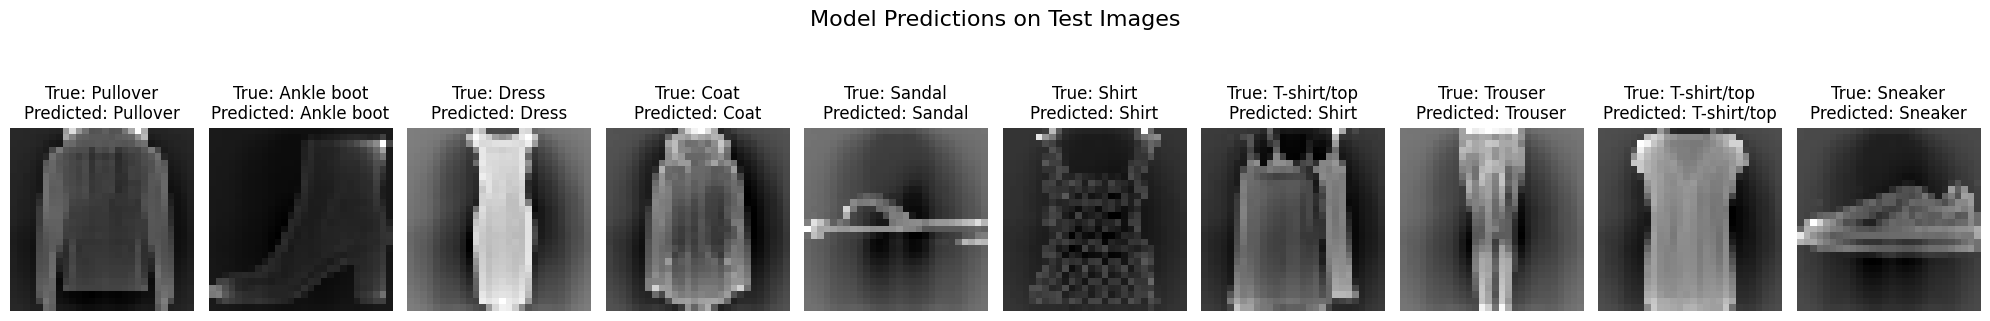

In [18]:
import random
import matplotlib.pyplot as plt

num_samples = 10
sample_indices = random.sample(range(len(X_test)), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
fig.suptitle("Model Predictions on Test Images", fontsize=16)

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, index in enumerate(sample_indices):
    # Get the image and label
    image = X_test[index].reshape(28, 28)
    label = y_test[index]

    # Make a prediction using the trained model
    prediction = clf.predict(image.reshape(1, -1))[0]

    # Plot the image and add the true label and predicted label
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {class_labels[label]}\nPredicted: {class_labels[prediction]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

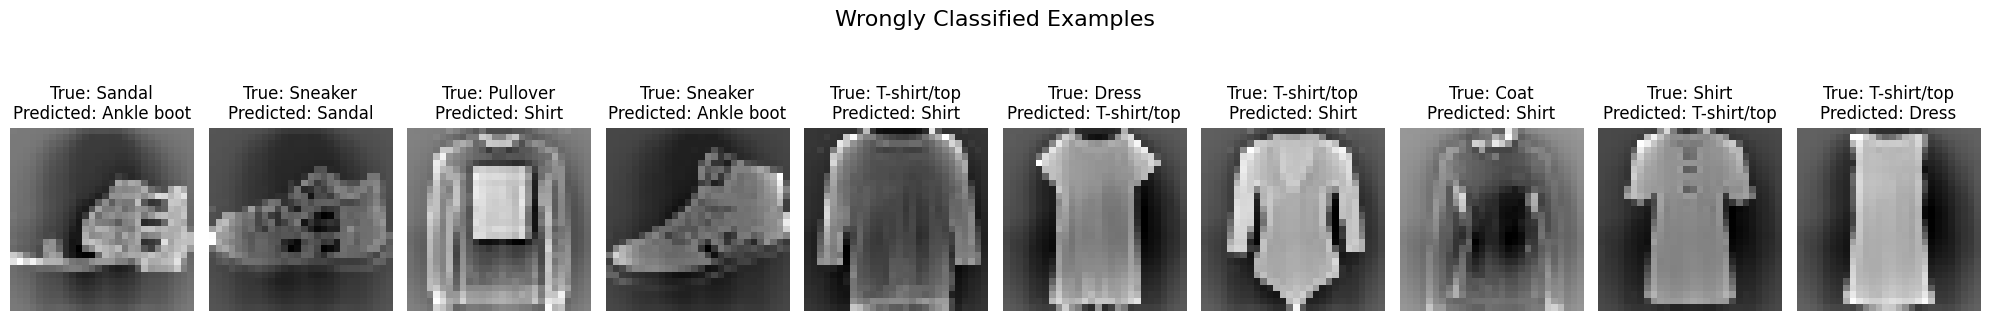

In [22]:
import random

# Get the indices of wrongly classified examples
wrong_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

# Randomly select a few wrongly classified examples
num_samples = 10
sample_indices = random.sample(wrong_indices, num_samples)

# Visualize the wrongly classified examples
fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
fig.suptitle("Wrongly Classified Examples", fontsize=16)

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, index in enumerate(sample_indices):
    # Get the image, true label, and predicted label
    image = X_test[index].reshape(28, 28)
    true_label = y_test[index]
    predicted_label = y_pred[index]

    # Plot the image and add the true label and predicted label
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()